[View in Colaboratory](https://colab.research.google.com/github/lycohen/ds_desafio_I/blob/master/Desafio%201%20-%20calidad.ipynb)

# LAB:   Desafío 1.

## Objetivos

* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

El dataset contiene información referida al primer semestre de 2017 de las propiedades comercializables por la empresa:

* Fecha de creación (solo un mes en analisis)
* Tipo de la propiedad (house, apartment, ph )
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m²
* Superficie cubierta en m²
* Precio en USD/m²
* Precio por m²
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer foto

## ¿Cómo empezar? Sugerencias
Agreguen toda otra información construida a partir de los datos originales (o incluso
información externa) que consideren relevante y útil para resolver los objetivos planteados.
Aprovechen las herramientas de pandas: gropuby , summation, pivot_tables y otras
aplicaciones y métodos de los DataFrames hacen mucho más simples los cálculos y otras
agregaciones de los datos.
En la presentación de los resultados tengan en cuenta que es altamente probable que la
audiencia no tenga un nivel técnico así que mantengan el lenguaje en un nivel accesible.
En términos generales, recuerden las siguientes sugerencias:
* escribir un pseudocódigo antes de empezar a codear. Suele ser muy útil para darle un esquema y una lógica generales al análisis
* leer la documentación de cualquier tecnología o herramienta de análisis que uses. A veces no hay tutoriales para todo y los documentos y las ayudas son fundamentales para entender el funcionamiento de las herramientas utilizadas
* documentar todos los pasos, transformaciones, comandos y análisis que realices.

## Recursos útiles
* Documentación de la librería GeoPandas
* Github

##Tareas

##1 - ver calidad
* NaN
* vacios
* inconsistencias entre keywords columnas vs keywords url
* monedad $/u$s
* EDA / Media central y outliers
* correlacion
* MNAR/MNCAR etc
* mejor opcion de fill

# Nueva sección

In [0]:


% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix


from sklearn.feature_extraction.text import CountVectorizer
#from unidecode import unidecode #QUITO TILDES


In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1qrD6-1YZk0OYbIhEDQ46QHwrxh5XMBfP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('properatti.csv')  



In [0]:
# Cargar la data de properati
df = pd.read_csv('properatti.csv')  # DATOS DE PROPIEDADES EN VENTA PROPERATI
#df = pd.read_csv('properatti.editado.csv')  # DATOS DE PROPIEDADES EN VENTA PROPERATI


In [0]:
###veo las columnas
df.columns


Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [0]:
##estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [0]:
####Una muestra al azar
df.sample(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
116981,116981,sell,house,Barrio San Gabriel,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.3767861594,-58.6974723502",-34.376786,...,192.0,1487.603306,1875.0,NaN,NaN,NaN,http://www.properati.com.ar/1ccy4_venta_casa_b...,Muy buenas terminaciones!!PB: living comedor c...,Excelente casa en lote interno en San Gabriel!!,https://thumbs4.properati.com/3/CuuLwlg_n0s5ir...
80582,80582,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9441158,-60.6662684",-32.944116,...,91.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1ax0e_venta_depart...,Unidad de dos dormitorios. Cocina. Estar/ come...,Departamento - Macrocentro,https://thumbs4.properati.com/0/mj3jg93VwY9gqq...


In [0]:
df.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

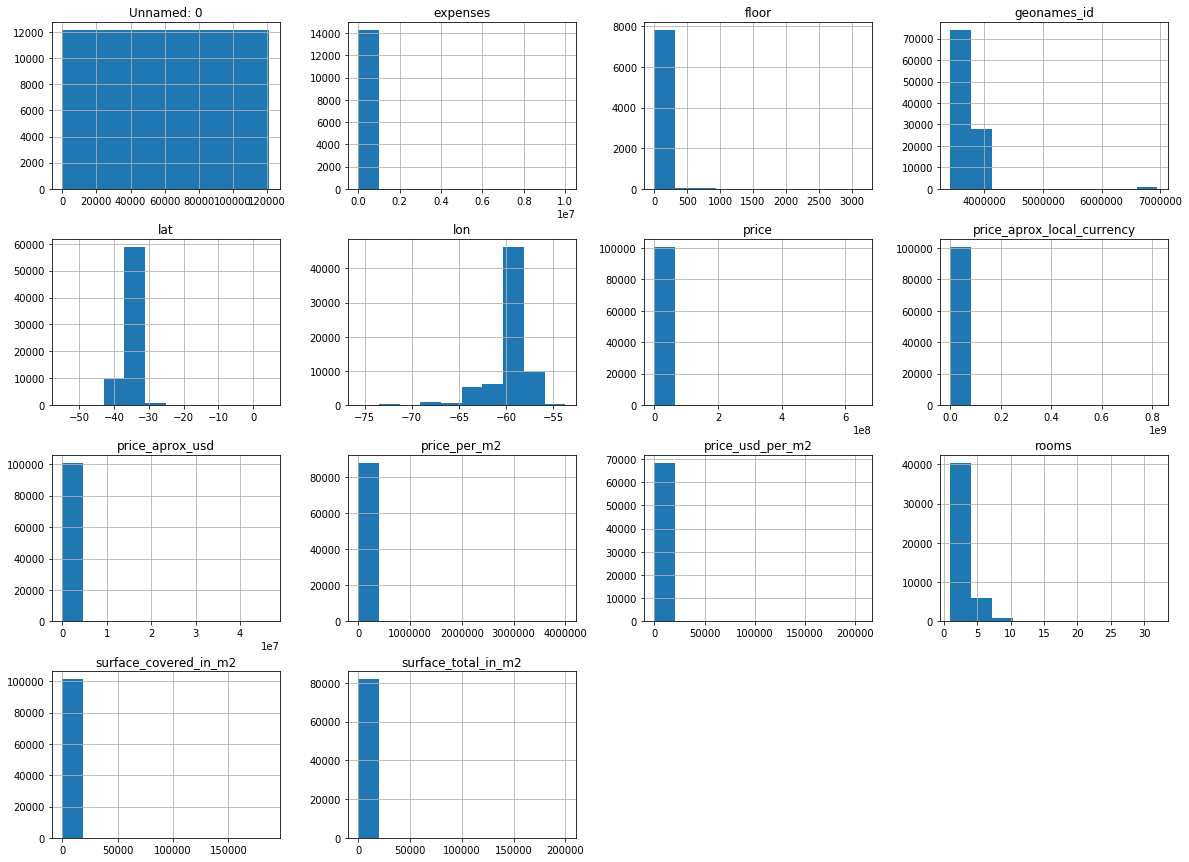

In [0]:
df.hist(figsize=(20,15));

In [0]:
def getCalidad(df):
    "Muestra los datos de un dataframe como en '.info()' pero de una manera mas facil de leer."
    
    # Cantidad total de registros
    total_rows = len(df)

    # Creamos el dataframe donde vamos a mostrar la estructura del dataset
    # Algo así como el .info() pero con mas información.
    df_retval = pd.DataFrame(columns=['NaNs #','NaNs %','Type','Dist'])

    # Por cada columna
    for col in df.columns:
        
        # Cantidad de Valores nulos
        nan_values = df[col].isnull().sum()
        
        # Porcentaje de Valores Nulos en el dataset
        nan_percentage = nan_values / total_rows * 100
        
        # El tipo de dato de la columna
        datatype = df[col].dtype
        
        distintos=df[col].nunique()
        
        # Agrego la fila al dataframe
        df_retval.loc[col] = [nan_values, nan_percentage, datatype,distintos]
        
        
        
    
    # Ordeno los valores por % de NaNs
    return df_retval.sort_values(by='NaNs %', ascending=False)

dfCalidad=getCalidad(df)
dfCalidad

,NaNs #,NaNs %,Type,Dist
floor,113321,93.483749,float64,182
expenses,106958,88.234615,float64,982
rooms,73830,60.905791,float64,31
price_usd_per_m2,52603,43.394654,float64,25567
lat-lon,51550,42.525986,object,47203
lat,51550,42.525986,float64,46495
lon,51550,42.525986,float64,46522
surface_total_in_m2,39328,32.443491,float64,1687
price_per_m2,33562,27.686850,float64,25185
currency,20411,16.837981,object,4


In [0]:
#obtengo los redundantes . No suman al modelo.
dfCalidad[dfCalidad['Dist']==1]

,NaNs #,NaNs %,Type,Dist
operation,0,0.0,object,1
country_name,0,0.0,object,1


In [0]:
#Ponemos la lupa en las que podrian ser claves/identificadores del modelo(object) y son no numericos 
dfCalidadDescriptivas = dfCalidad[dfCalidad['Type']=='object']
dfCalidadDescriptivas

,NaNs #,NaNs %,Type,Dist
lat-lon,51550,42.525986,object,47203
currency,20411,16.837981,object,4
image_thumbnail,3112,2.567233,object,114389
place_name,23,0.018974,object,1060
description,2,0.001650,object,104055
operation,0,0.000000,object,1
state_name,0,0.000000,object,28
country_name,0,0.000000,object,1
place_with_parent_names,0,0.000000,object,1164
property_type,0,0.000000,object,4


In [0]:
dfCalidadDescriptivas = dfCalidad[dfCalidad['Type']=='object']
#Trunco las redundantes y lat-lon por la cantidad de nulls y por ser redundantes con las variables de ubicuidad
dfCalidadDescriptivas= dfCalidadDescriptivas.drop(['operation','country_name','lat-lon'])
q05Calidad= dfCalidadDescriptivas['Dist'].median()


Los claves o candidatos a serlo.

In [0]:

dfCalidadDescriptivas[dfCalidadDescriptivas[dfCalidadDescriptivas['Type']=='object']['Dist']< q05Calidad]

,NaNs #,NaNs %,Type,Dist
currency,20411,16.837981,object,4
place_name,23,0.018974,object,1060
state_name,0,0.000000,object,28
property_type,0,0.000000,object,4


Cuentame mas de currency,place_name,property_type y state_name

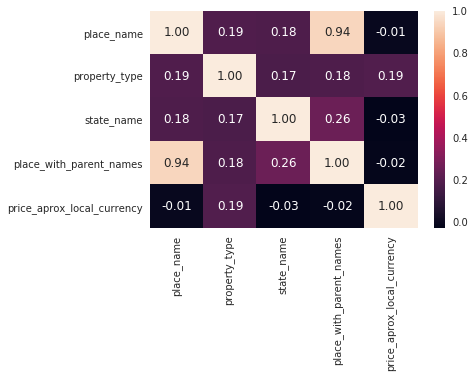

In [0]:

sliceClaves = df.loc[:,['place_name','property_type','state_name','place_with_parent_names']]
#sliceClaves = df

dfCorr= sliceClaves.apply(lambda x: x.factorize()[0])
dfCorr['price_aprox_local_currency']=df['price_aprox_local_currency']





sns.set(style="white")

sns.heatmap(dfCorr.corr(), annot=True, fmt=".2f");



Parece que currency esta rara respecto de las demas para ser clave....
Por lo demas vemos algun nivel relacion precio ubicacion
Veamos mas...


In [0]:
(df.currency.factorize())[0].size

121220

In [0]:
df[(df.currency !='USD') & (df.currency!='ARS')&  ~(df.currency.isna())].shape

(3, 26)

Pocos con null o no dolar ni ARS

In [0]:
print('Cant cotizada en USD', df[(df.currency !='USD')  & ~(df.currency.isna())].currency.count())
print('Cant cotizada en ARS', df[(df.currency !='ARS')  & ~(df.currency.isna())].currency.count())



Cant cotizada en USD 13222
Cant cotizada en ARS 87590


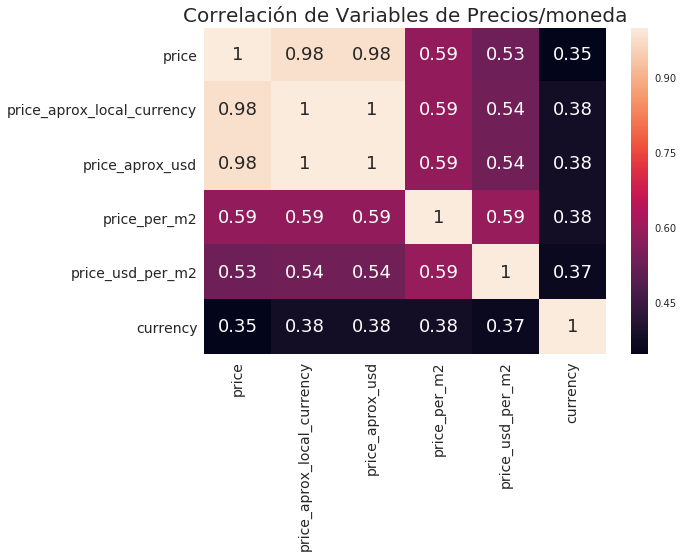

In [0]:
#display(df[(df.currency =='USD')].price.describe(), df['price_aprox_usd'].describe())

dfPrecios=df.loc[:,['price','price_aprox_local_currency','price_aprox_usd','price_per_m2','price_usd_per_m2','currency']]
dfPrecios = dfPrecios.apply(lambda x: x.factorize()[0]).copy()
plt.figure(figsize=(9,6))
sns.heatmap(dfPrecios.corr(), annot=True, annot_kws={"size": 18})
plt.title('Correlación de Variables de Precios/moneda', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


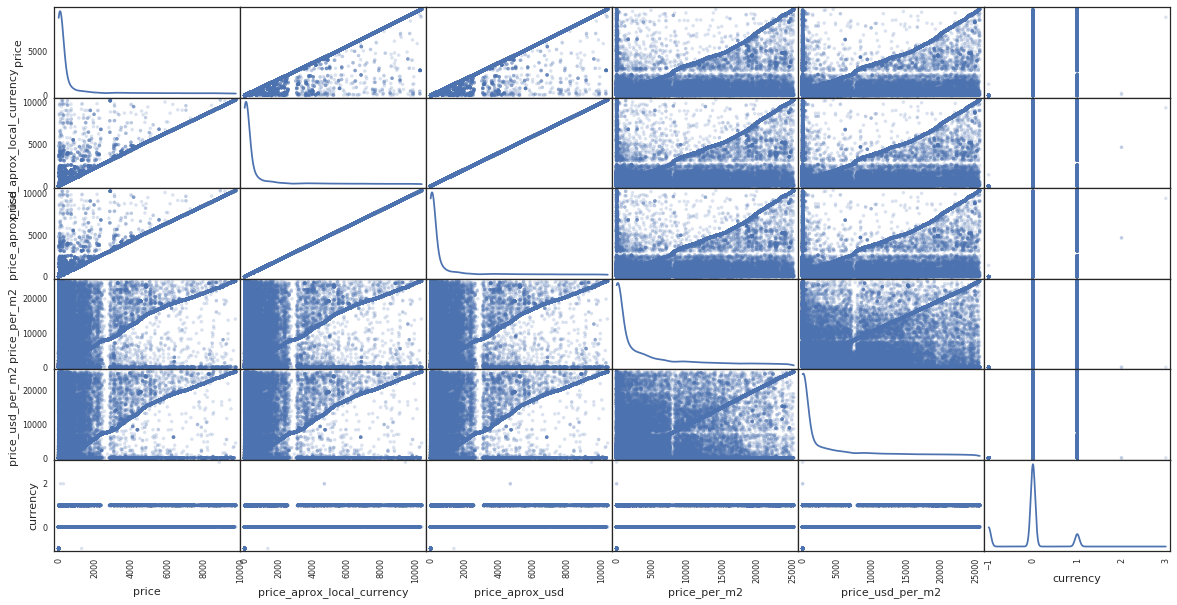

In [0]:

pd.scatter_matrix(dfPrecios, alpha=0.2, figsize=(20, 10),diagonal='kde');
plt.show();

Si bien hay una correlacion entre todas las variables Hay 2 grupos:precio y precio/m2.
La moneda tiene un coeficiente de correlacion similar para todas las series aunque se ve que monedas es $(85%como se vio arriba) y que tiene nans (-1 factorizacion) .

## Conocemos un poco mas y podemos decir que hay 3 grupos de campos que potencialmente podrian ser relevantes para mi  modelo
Los que dan idea de ubicacion,los de precio  y los que dan idea de caractiristicas o features.

geoFields=['place_name','place_with_parent_names', 'country_name', 'state_name', 'geonames_id','lat-lon', 'lat', 'lon']

featureFields=['property_type', 'floor', 'rooms', 'expenses', 'properati_url', 'description', 'title',surface_total_in_m2, surface_covered_in_m2]

priceFields=['price', 'currency','price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']
 
Y de alguno de ellos las caracteristicas son explicitas. En otros calculadas u obtenidas de manera indirecta 


Veamos la relacion entre algunos features y precio.
  



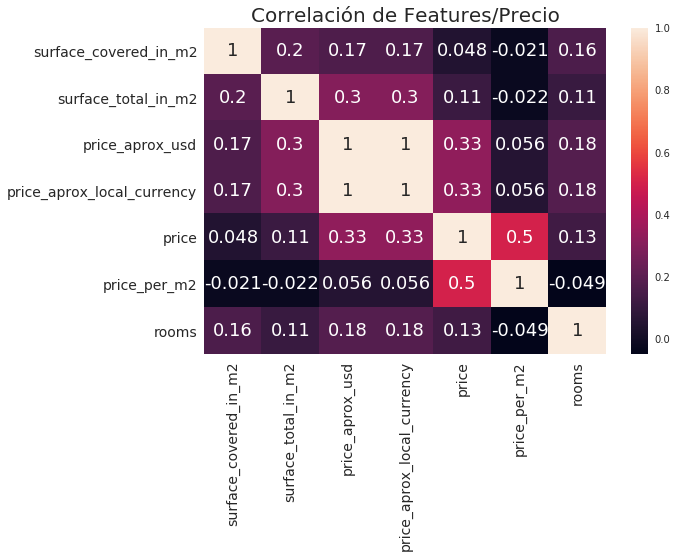

In [0]:
plt.figure(figsize=(9,6))
sns.heatmap(df[['surface_covered_in_m2','surface_total_in_m2','price_aprox_usd','price_aprox_local_currency','price','price_per_m2','rooms']].corr(), annot=True, annot_kws={"size": 18})
plt.title('Correlación de Features/Precio', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14);

Este mapa lo armamos dividiendo el precio total / precio por metro cuadrado va a dar una superficie que define el precio...es la cubierta o o total???. La variable total_div_per_m2 es el valor resultante y, al compararlo con superficie total y superficie cubierta, podemos ver que claramente el precio total está relacionado directamente al la superficie total y no a la superficie cubierta.



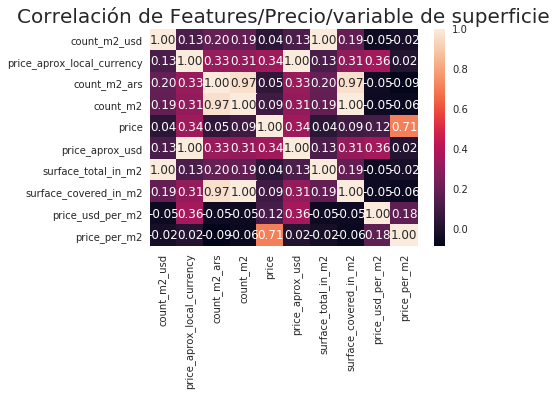

In [0]:
#### Hago lo mismo pero divido alguna de las variables de precio (precio) por precio m2 en usd
#### Hago lo mismo pero divido alguna de las variables de precio (precio ars) por precio m2 en local currency


df['count_m2_usd']=df['price_aprox_usd'] / df['price_usd_per_m2']
df['count_m2_ars']=df['price_aprox_local_currency'] / df['price_per_m2']
df['count_m2']=df['price'] / df['price_per_m2']



slicePrecios=df.loc[:,['count_m2_usd','price_aprox_local_currency', 'count_m2_ars','count_m2','price','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]
slicePrecios=slicePrecios.dropna()

sns.set(style="white")
corr = slicePrecios.corr()

sns.heatmap(slicePrecios.corr(), annot=True, fmt=".2f");
plt.title('Correlación de Features/Precio/variable de superficie', fontsize=20);
#### hay alta correlacion entre price-local-currency/price_per_m2 y surface_coveres_in_m2


Se ve que la variable calculada de m2 relacionada con la superficie cubierta.
Al hacer ['price_aprox_local_currency'] / ['price_per_m2'] se ve relacion entr m2 calculados vs m2 cubiertos.
El precio depende de m2 cubiertos.

al imputar vamos con eso.


In [0]:

#pd.scatter_matrix(slicePrecios, alpha=0.2, figsize=(10, 10),diagonal='kde');
#plt.show();

In [0]:
slicePreciosTruncado=slicePrecios[slicePrecios.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)].copy()
slicePreciosCat=slicePreciosTruncado.loc[:,['price','total_div_per_m2','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]
display(slicePreciosCat.describe(),
slicePrecios.describe())

,price,total_div_per_m2,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
count,6.020300e+04,60203.000000,6.020300e+04,60203.000000,60203.000000,60203.000000,60203.000000
mean,3.628962e+05,333.701385,2.171217e+05,176.761225,111.277146,1893.423881,5138.343483
std,4.645351e+05,849.644545,1.912480e+05,273.665358,103.308134,1072.887105,9017.988558
min,5.500000e+03,10.000000,4.666620e+03,10.000000,1.000000,9.875610,49.000000
25%,1.100000e+05,55.000000,9.300000e+04,50.000000,45.000000,1205.736379,1583.333333
50%,1.850000e+05,107.000000,1.500000e+05,83.000000,70.000000,1785.714286,2243.243243
75%,3.700000e+05,294.000000,2.700000e+05,200.000000,145.000000,2432.729505,3235.294118
max,3.327355e+06,26745.754854,1.280000e+06,5000.000000,1350.000000,10714.285714,51466.346939


,total_div_per_m2,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
count,6.335000e+04,6.335000e+04,6.335000e+04,63350.00000,63350.000000,63350.000000,63350.000000
mean,4.963609e+02,4.756811e+05,2.537005e+05,222.14371,125.376417,2192.247861,6600.021086
std,1.149849e+04,9.527614e+05,3.428609e+05,1632.14462,414.844675,2846.354886,14963.204063
min,1.000000e+01,5.500000e+03,4.666620e+03,10.00000,1.000000,0.600000,1.510204
25%,5.500000e+01,1.150000e+05,9.500000e+04,50.00000,45.000000,1225.712313,1606.557377
50%,1.110000e+02,1.950000e+05,1.550000e+05,84.00000,71.000000,1818.181818,2306.666667
75%,3.200000e+02,4.300000e+05,2.900000e+05,200.00000,150.000000,2500.000000,3420.173913
max,1.907864e+06,5.000000e+07,1.200000e+07,200000.00000,49000.000000,206333.333333,692046.000000


In [0]:
slicePreciosTruncado.reset_index;
slicePreciosTruncado=slicePreciosTruncado.apply(lambda x: x.factorize()[0]).copy()

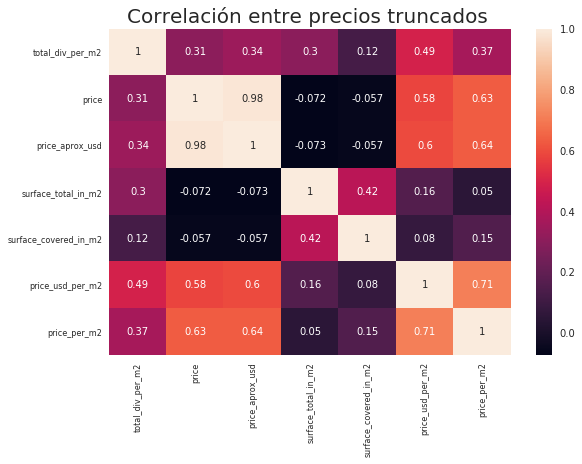

In [0]:
plt.figure(figsize=(9,6))
sns.heatmap(slicePreciosTruncado.corr(), annot=True, annot_kws={"size": 10})
plt.title('Correlación entre precios truncados ', fontsize=20)
plt.yticks(fontsize=8, rotation=0)
plt.xticks(fontsize=8);

In [0]:


slicePreciosCat=slicePreciosTruncado.loc[:,['price','total_div_per_m2','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]


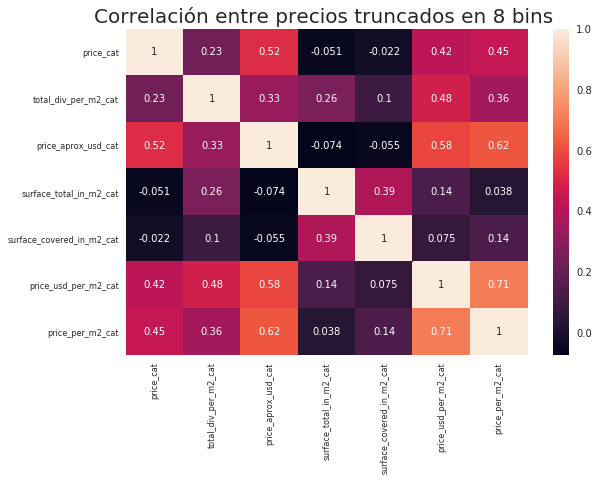

In [0]:
slicePreciosTruncado['price_cat'] =pd.qcut(slicePreciosTruncado['price'],4,labels=[1,2,3,4])
slicePreciosTruncado['total_div_per_m2_cat'] =pd.cut(slicePreciosTruncado['total_div_per_m2'],8,labels=[1,2,3,4,5,6,7,8])
slicePreciosTruncado['price_aprox_usd_cat'] =pd.cut(slicePreciosTruncado['price_aprox_usd'],8,labels=[1,2,3,4,5,6,7,8])
slicePreciosTruncado['surface_total_in_m2_cat'] =pd.cut(slicePreciosTruncado['surface_total_in_m2'],8,labels=[1,2,3,4,5,6,7,8])
slicePreciosTruncado['surface_covered_in_m2_cat'] =pd.cut(slicePreciosTruncado['surface_covered_in_m2'],8,labels=[1,2,3,4,5,6,7,8])
slicePreciosTruncado['price_usd_per_m2_cat'] =pd.cut(slicePreciosTruncado['price_usd_per_m2'],8,labels=[1,2,3,4,5,6,7,8])
slicePreciosTruncado['price_per_m2_cat'] =pd.cut(slicePreciosTruncado['price_per_m2'],8,labels=[1,2,3,4,5,6,7,8])



slicePreciosCat=slicePreciosTruncado.loc[:,['price_cat','total_div_per_m2_cat','price_aprox_usd_cat','surface_total_in_m2_cat','surface_covered_in_m2_cat','price_usd_per_m2_cat','price_per_m2_cat']]
slicePreciosCat=slicePreciosCat.apply(lambda x: x.factorize()[0]).copy()
plt.figure(figsize=(9,6))
sns.heatmap(slicePreciosCat.corr(), annot=True, annot_kws={"size": 10})
plt.title('Correlación entre precios truncados en 8 bins ', fontsize=20)
plt.yticks(fontsize=8, rotation=0)
plt.xticks(fontsize=8);

Identificamos que el precio de las propiedades es por m2 totales (**surface_total_in_m2**), calculando el precio / precio por metro cuadrado. Esto nos devuelve un valor que cuando lo comparamos contra superficie total vemos que es exactamente el mismo, por lo que encontramos que hay una relación directa de precio total contra superficie total

Hay 2 cosas : precio y precio por m2 van de la mano. ***superficie total m2 va de la mano con el total de m2 calculado.

** EL PRECIO ES POR M2 TOTAL CUBIERTO. F(price_per_m2 y surface_total_in_m2)

## LO miro mas de cerca

In [0]:
df_tmp = df[['price_aprox_usd','price_usd_per_m2','surface_total_in_m2','surface_covered_in_m2']].copy()
df_tmp['total_div_per_m2'] = df_tmp['price_aprox_usd'] / df_tmp['price_usd_per_m2']

plt.figure(figsize=(7,5))
sns.heatmap(df_tmp[['surface_total_in_m2','surface_covered_in_m2','total_div_per_m2']].corr(), annot=True, annot_kws={"size": 18})
plt.title('Relación de Precio vs Superficie (total y cubierta)', fontsize=16)

In [0]:

scatter_matrix(df_tmp, alpha=0.2, figsize=(25,25));

## outliers...

In [0]:
# Graficamos un Scatter de precio contra superficie
plt.scatter(x=df['surface_covered_in_m2'], y=df['price_aprox_usd']);

In [0]:
De todos modos hay algunos NANS (cerca del 25%)

In [0]:
df['total_div_per_m2']=df['price'] / df['price_usd_per_m2']


In [0]:
df.total_div_per_m2.isna().sum()

Qué Representa el precio?
Identificamos que el precio de las propiedades es por m2 totales (surface_total_in_m2), calculando el precio / precio por metro cuadrado. Esto nos devuelve un valor que cuando lo comparamos contra superficie total vemos que es exactamente el mismo, por lo que encontramos que hay una relación directa de precio total contra superficie total


## Relacion features y precio

In [0]:
#g = sns.FacetGrid(df, row='price_per_m2', col='property_type')
#g.map(sns.distplot, "state_name")
#plt.show()
df_ = df.fillna(0)


plt.figure(figsize=(9,6))
sns.heatmap(df_[['surface_total_in_m2','price_aprox_usd','rooms']].corr(), annot=True, annot_kws={"size": 18})
plt.title('Correlación de Features/Precio', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14);

## El precio parece guardar mas relacion con la superficie que con la cantidad de ambientes.

Puntos Extremos de la Parte Continental Americana
Norte: Confluencia de los ríos Grande de San Juan y Mojinete, en la Provincia de Jujuy (Latitud 21º 46' 52" S; Longitud 66º 13' 17" O). Aproximadamente 425 m al sudeste de dicho accidente geográfico se encuentra el Hito Testigo II-15, cuya coordenada de acuerdo a la CONALI es Latitud 21º 47' 02.50" S y Longitud 66º 13' 08.14" O. Carta topográfica 2166-I y III.
Sur: Cabo San Pío, situado en la isla Grande de Tierra del Fuego, Provincia de Tierra del Fuego, Antártida e Islas del Atlántico Sur (Latitud 55º 03' 21" S; Longitud 66º 31' 25" O). Carta topográfica 5566-I y II.
Este: Hito V (CONALI), punto situado en la localidad de Bernardo de Irigoyen, en la Provincia de Misiones (Latitud 26º 15' 59" S; Longitud 53º 38' 15" O). Carta topográfica 2754-II.
Oeste: Punto ubicado en el Parque Nacional Los Glaciares, en la Provincia de Santa Cruz (Latitud 50º 01’ S; Longitud 73º 34' O). Carta topográfica 5172-I y 5175-II.



In [0]:
df[df['lat']<-55]
df.loc[:,['lat','lon']].describe()

display(df[df['lat']>-21.46], df[df['lon']<-73.34])






In [0]:

plt.figure(figsize=(9,6))
sns.heatmap(df[['surface_covered_in_m2','surface_total_in_m2','price_aprox_usd','expenses','floor','rooms']].corr(), annot=True, annot_kws={"size": 18})
plt.title('Correlación de Features/Precio', fontsize=20)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14);





In [0]:
df.property_type= df["property_type"].astype('category')

df.price_per_m2.fillna(-1)


df.property_type_id = pd.factorize(df.property_type)





dfCorr= df.loc[:,['property_type_id','price_per_m2']]

In [0]:
dfCorr=dfCorr.apply(lambda x: x.factorize()[0])

In [0]:
dfCorr

In [0]:
dfCorr.corr()